In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import torch
import copy
from matplotlib.colors import hsv_to_rgb
import pandas as pd

In [4]:
data = pd.read_csv('Z:/DATA/4_polar_MFM_out_of_plane/FOR_REPORT.csv', delimiter=';')
frame = data['frame']
x = data['x']
y = data['y']
z = data['z']
rho = data['rho']
eta = data['eta']
delta = data['delta']
N_photons = data['N_photon']
offset_polar = data['offset_polar']
score = data['score']
x_start = data['x_start']
y_start = data['y_start']
z_start = data['z_start']
rho_start = data['rho_start']
delta_start = data['delta_start']

In [5]:
eta90 = copy.deepcopy(eta)
for ii in range(len(eta90)):
    if eta90[ii]>90:
        eta90[ii] = 180.-eta90[ii]

Text(0, 0.5, 'Occurences')

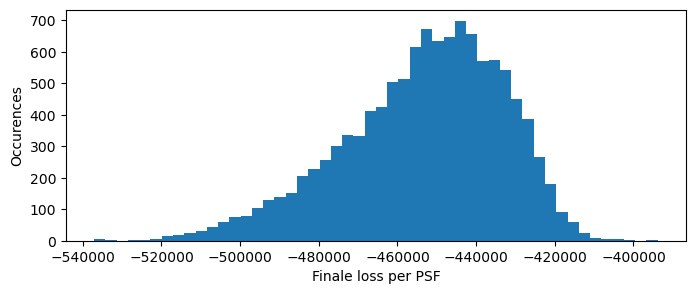

In [6]:
plt.rcParams['figure.figsize'] = [8,3]
hist = plt.hist(score, bins=50)
plt.xlabel('Finale loss per PSF')
plt.ylabel('Occurences')

Text(0, 0.5, 'Occurences')

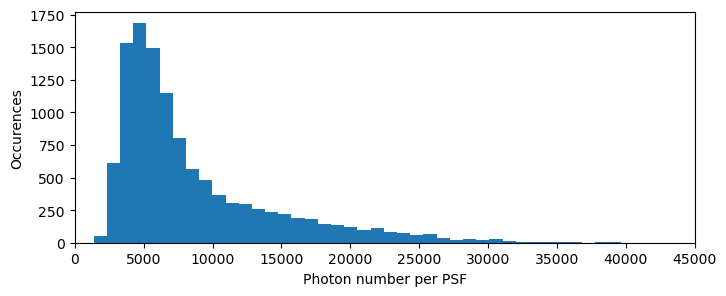

In [7]:
plt.rcParams['figure.figsize'] = [8,3]
hist = plt.hist(N_photons, bins=80)
plt.xlim((0, 45000))
plt.xlabel('Photon number per PSF')
plt.ylabel('Occurences')

Text(0, 0.5, 'Occurences')

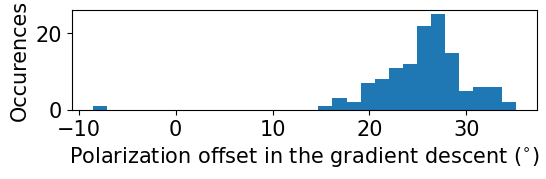

In [8]:
plt.rcParams['figure.figsize'] = [6,1.3]
plt.rcParams.update({'font.size': 15})
hist = plt.hist(offset_polar, bins=30)
plt.xlabel('Polarization offset in the gradient descent ($^{\\circ}$)')
plt.ylabel('Occurences')

In [9]:
threshold = (score<-430000) & (delta<150) & (x>17500) & (x<200000) & (y>2000) & (y<5500) & (z<1450) & (N_photons>3000) 
threshold2 = (score<-430000) & (delta<150) & (x>10000) & (x<22500) & (y>2000) & (y<15000)  & (N_photons>3000) 
threshold3 = (score<-430000) & (delta<150) & (x>10000) & (x<22500) & (y>2000) & (y<15000) & (z<1450) & (N_photons>3000)
threshold4 = (score<-430000) & (N_photons>3000) 
bille1 = (score<-430000) & (delta<150) & (x>10000) & (x<16000) & (y>10000) & (y<14000) & (N_photons>3000) & (z<1450)

threshold = (score<-430000) & (delta<150) & (x>17500) & (x<200000) & (y>2000) & (y<5500) & (z<1450) & (N_photons<85000) & (N_photons>6000) 
threshold2 = (score<-430000) & (delta<150) & (x>10000) & (x<22500) & (y>2000) & (y<15000) & (N_photons<85000) & (N_photons>6000) 
threshold3 = (score<-430000) & (delta<150) & (x>10000) & (x<22500) & (y>2000) & (y<15000) & (z<1450) & (N_photons<85000) & (N_photons>6000) 
threshold4 = (score<-430000) & (N_photons<85000) & (N_photons>6000) 

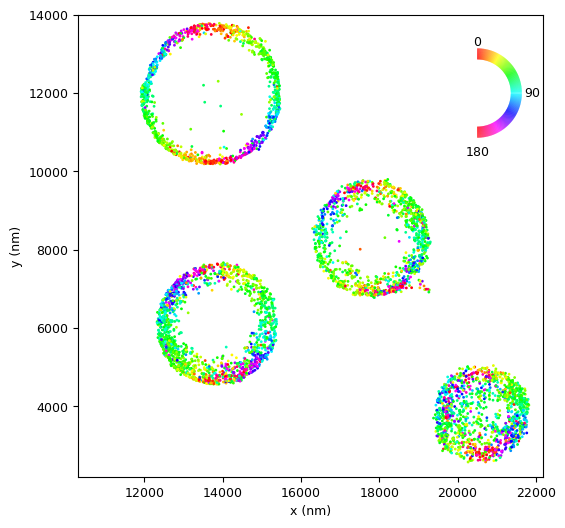

In [10]:
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams.update({'font.size': 9})
hues = rho[threshold2] / 180.0
hsv_colors = np.stack((hues, np.ones_like(hues), np.ones_like(hues)), axis=1)
rgb_colors = hsv_to_rgb(hsv_colors)
plt.scatter(x[threshold2], y[threshold2], c=rgb_colors, s=1)
plt.axis('equal')
plt.xlim((10000, 22500))
plt.ylim((2200, 14000))
plt.xlabel('x (nm)')
plt.ylabel('y (nm)')

# Half-circle colorbar rotated 90° clockwise
center_x, center_y = 20500, 12000
radius = 1000
angles = np.linspace(0, np.pi, 200)  # rotated arc
for i in range(len(angles)-1):
    theta1, theta2 = angles[i], angles[i+1]
    hue = (np.degrees(theta1)) / 180.0  # Map to 0-1 range
    color = hsv_to_rgb([hue, 1, 1])
    arc_x = [center_x + radius * np.cos(np.pi/2-theta1), center_x + radius * np.cos(np.pi/2-theta2)]
    arc_y = [center_y + radius * np.sin(np.pi/2-theta1), center_y + radius * np.sin(np.pi/2-theta2)]
    plt.plot(arc_x, arc_y, color=color, lw=8, solid_capstyle='butt')

# Tick labels with offset
tick_angles = [0, 90, 180]  # Corresponding to hue range
label_offset = [300,400, 500]
for i, ang in enumerate(tick_angles):
    rad = np.radians(ang)
    tx = center_x + (radius + label_offset[i]) * np.cos(np.pi/2-rad)
    ty = center_y + (radius + label_offset[i]) * np.sin(np.pi/2-rad)
    plt.text(tx, ty, f"{(ang)}", ha='center', va='center', fontsize=9)

plt.show()

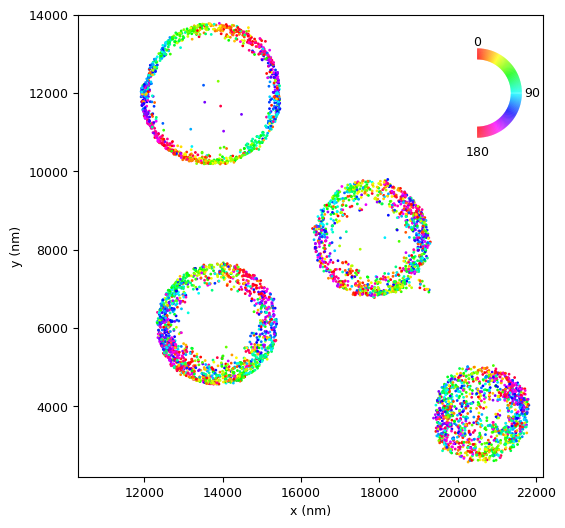

In [11]:
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams.update({'font.size': 9})
hues = rho_start[threshold2] / 180.0
hsv_colors = np.stack((hues, np.ones_like(hues), np.ones_like(hues)), axis=1)
rgb_colors = hsv_to_rgb(hsv_colors)
plt.scatter(x_start[threshold2], y_start[threshold2], c=rgb_colors, s=1)
plt.axis('equal')
plt.xlim((10000, 22500))
plt.ylim((2200, 14000))
plt.xlabel('x (nm)')
plt.ylabel('y (nm)')

# Half-circle colorbar rotated 90° clockwise
center_x, center_y = 20500, 12000
radius = 1000
angles = np.linspace(0, np.pi, 200)  # rotated arc
for i in range(len(angles)-1):
    theta1, theta2 = angles[i], angles[i+1]
    hue = (np.degrees(theta1)) / 180.0  # Map to 0-1 range
    color = hsv_to_rgb([hue, 1, 1])
    arc_x = [center_x + radius * np.cos(np.pi/2-theta1), center_x + radius * np.cos(np.pi/2-theta2)]
    arc_y = [center_y + radius * np.sin(np.pi/2-theta1), center_y + radius * np.sin(np.pi/2-theta2)]
    plt.plot(arc_x, arc_y, color=color, lw=8, solid_capstyle='butt')

# Tick labels with offset
tick_angles = [0, 90, 180]  # Corresponding to hue range
label_offset = [300,400, 500]
for i, ang in enumerate(tick_angles):
    rad = np.radians(ang)
    tx = center_x + (radius + label_offset[i]) * np.cos(np.pi/2-rad)
    ty = center_y + (radius + label_offset[i]) * np.sin(np.pi/2-rad)
    plt.text(tx, ty, f"{(ang)}", ha='center', va='center', fontsize=9)

plt.show()

In [12]:
def loss__(x,y,radius,centerx, centery):
    return torch.sum(((x-centerx)**2 + (y-centery)**2-radius**2)**2)

In [13]:
def find_params(xxxx, yyyy):
    params = torch.tensor([1000.,13500.,12000.], requires_grad=True)
    optimizer = torch.optim.Adam([params], lr=100)
    loss0 = []
    for i in tqdm(range(100)):
        optimizer.zero_grad()  # Reset gradients
        loss = loss__(torch.tensor(xxxx), torch.tensor(yyyy), params[0], params[1], params[2])
        loss0.append(loss.detach().numpy())
        loss.backward()  # Backpropagation
        optimizer.step()  # Update parameters
    plt.plot(loss0)
    plt.show()
    return params.detach().numpy()

100%|██████████| 100/100 [00:00<00:00, 1871.82it/s]


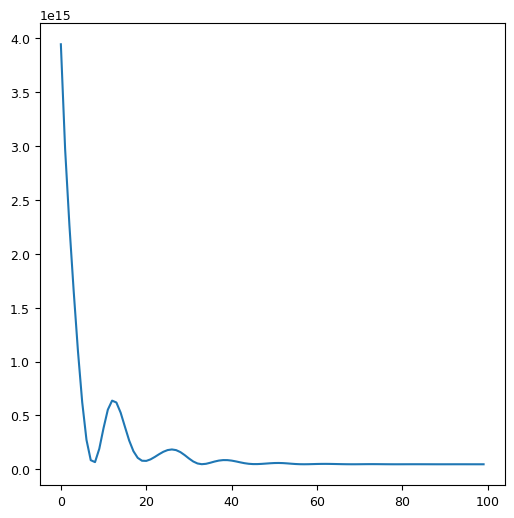

In [14]:
params = find_params(x[bille1].to_numpy(), y[bille1].to_numpy())

In [15]:
rho_th = np.arctan2(x[bille1]-params[1], y[bille1]-params[2])*(180/np.pi)%180
th = np.linspace(0,2*np.pi,100)
line = np.arctan2(params[1]+(200+params[0])*np.cos(th)-params[1], params[2]+(200+params[0])*np.sin(th)-params[2])*(180/np.pi)%180.
huesL = line / 180
hsv_colorsL = np.stack((huesL, np.ones_like(huesL), np.ones_like(huesL)), axis=1)
rgb_colorsL = hsv_to_rgb(hsv_colorsL)

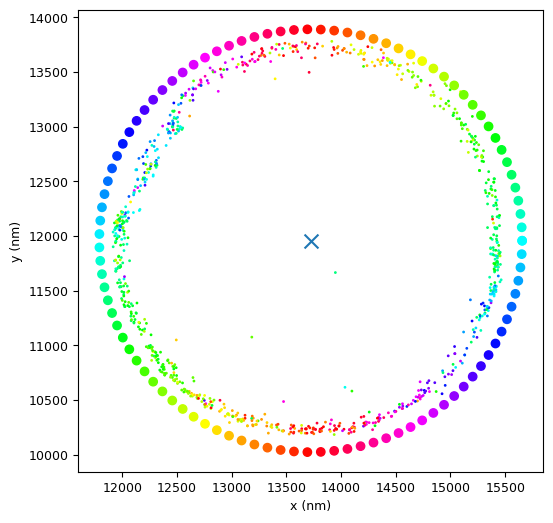

In [16]:
plt.rcParams['figure.figsize'] = [6, 6]
hues = rho[bille1] / 180
hsv_colors = np.stack((hues, np.ones_like(hues), np.ones_like(hues)), axis=1)
rgb_colors = hsv_to_rgb(hsv_colors)
plt.scatter(x[bille1], y[bille1], c=rgb_colors, s=1)
plt.plot()
plt.axis('equal')
plt.xlabel('x (nm)')
plt.ylabel('y (nm)')
plt.scatter(params[1], params[2], marker='x', s=100)
plt.scatter(params[1]+(200+params[0])*np.cos(th), params[2]+(200+params[0])*np.sin(th), c=rgb_colorsL)
plt.show()

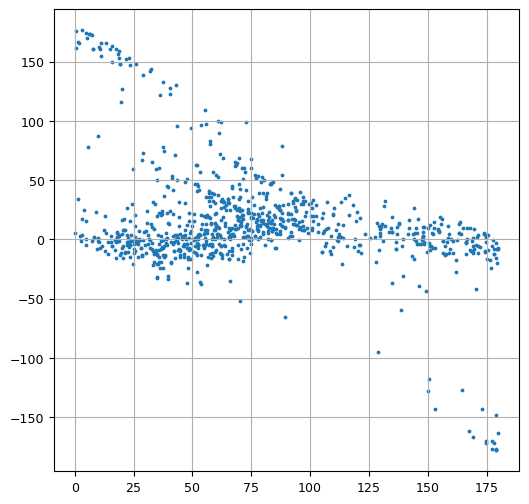

In [17]:
plt.scatter(rho[bille1], (rho_th-rho[bille1]), s=3)
plt.grid()

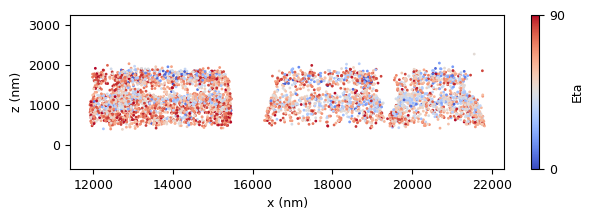

In [18]:
plt.rcParams['figure.figsize'] = [7,2]
normalized = eta90[threshold2] / 90.0

color_data = eta90[threshold2] / 90.0  # Normalize your color data


rgb_colors = hsv_to_rgb(hsv_colors)
scatter = plt.scatter(x[threshold2] , z[threshold2], cmap='coolwarm', c = color_data, s=1)
plt.axis('equal')

# Add colorbar
cb = plt.colorbar(scatter)
cb.set_label('Eta')
cb.set_ticks([0.0, 1.0])
cb.set_ticklabels(['0', '90'])
plt.xlabel('x (nm)')
plt.ylabel('z (nm)')
plt.show()

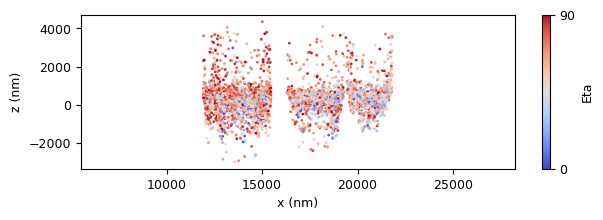

In [19]:
plt.rcParams['figure.figsize'] = [7,2]
normalized = eta90[threshold2] / 90.0

color_data = eta90[threshold2] / 90.0  # Normalize your color data


rgb_colors = hsv_to_rgb(hsv_colors)
scatter = plt.scatter(x_start[threshold2] , z_start[threshold2], cmap='coolwarm', c = color_data, s=1)
plt.axis('equal')

# Add colorbar
cb = plt.colorbar(scatter)
cb.set_label('Eta')
cb.set_ticks([0.0, 1.0])
cb.set_ticklabels(['0', '90'])
plt.xlabel('x (nm)')
plt.ylabel('z (nm)')
plt.show()

(19263.249989090353, 21942.30564175805, 2452.2432667732382, 5162.239561375067)

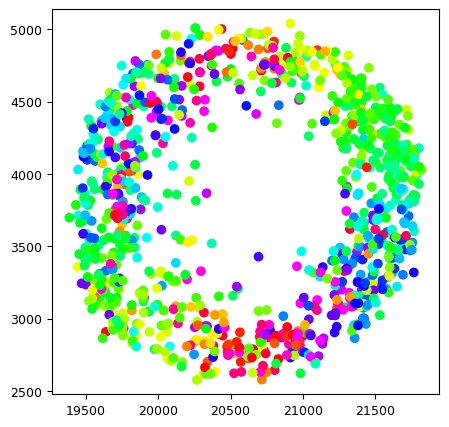

In [20]:
plt.rcParams['figure.figsize'] = [5,5]
hues = rho[threshold] / 180.0
hsv_colors = np.stack((hues, np.ones_like(hues), np.ones_like(hues)), axis=1)

rgb_colors = hsv_to_rgb(hsv_colors)
plt.scatter(x[threshold] , y[threshold] , c = rgb_colors)
plt.axis('equal')


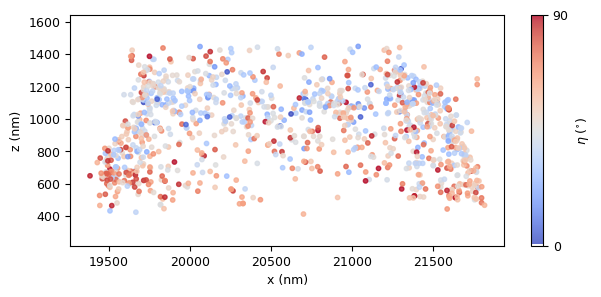

In [21]:
plt.rcParams['figure.figsize'] = [7,3]
x_vals = x[threshold]
z_vals = z[threshold]
color_data = eta90[threshold] / 90.0  # Normalize your color data

# Create scatter plot with color mapping
scatter = plt.scatter(x_vals, z_vals, c=color_data, cmap='coolwarm', s=10, alpha=0.8)
plt.axis('equal')

# Add colorbar
cb = plt.colorbar(scatter)
cb.set_label('$\\eta$ $(^{\\circ})$')
cb.set_ticks([0.0, 1.0])
cb.set_ticklabels(['0', '90'])
plt.xlabel('x (nm)')
plt.ylabel('z (nm)')
plt.show()


Text(0, 0.5, 'Occurences')

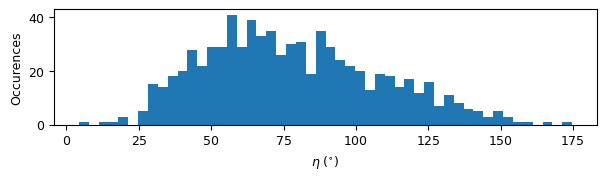

In [22]:
plt.rcParams['figure.figsize'] = [7,1.5]
hist = plt.hist(eta[threshold2 & (z<800) & (z>600)], bins=50)
#hist = plt.hist(eta[threshold2 & (z<500) & (z>0)], bins=50)
plt.xlabel('$\\eta$ $(^{\\circ})$')
plt.ylabel('Occurences')

Text(0, 0.5, 'Occurences')

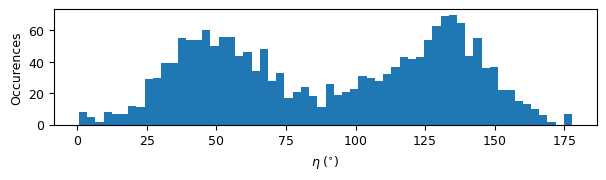

In [23]:
plt.rcParams['figure.figsize'] = [7,1.5]
hist = plt.hist(eta[threshold2 & (z<1400) & (z>1000)], bins=60)
#hist = plt.hist(eta[threshold2 & (z>500)], bins=60)
#plt.ylim((0,85))
plt.xlabel('$\\eta$ $(^{\\circ})$')
plt.ylabel('Occurences')

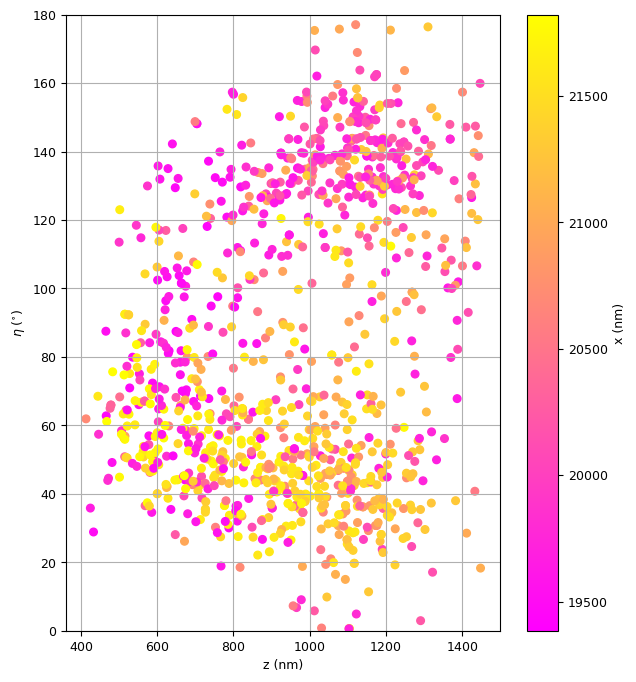

In [24]:
plt.rcParams['figure.figsize'] = [7,8]
color_data = x[threshold]
scatter = plt.scatter(z[threshold], eta[threshold], c = color_data, cmap='spring', s=30)
cb = plt.colorbar(scatter)
cb.set_label('x (nm)')
#cb.set_ticks([0.0, 1.0])
#cb.set_ticklabels(['0', '90'])
plt.xlabel('z (nm)')
plt.ylabel('$\\eta$ $(^{\\circ})$')
plt.ylim((0,180))
plt.grid()

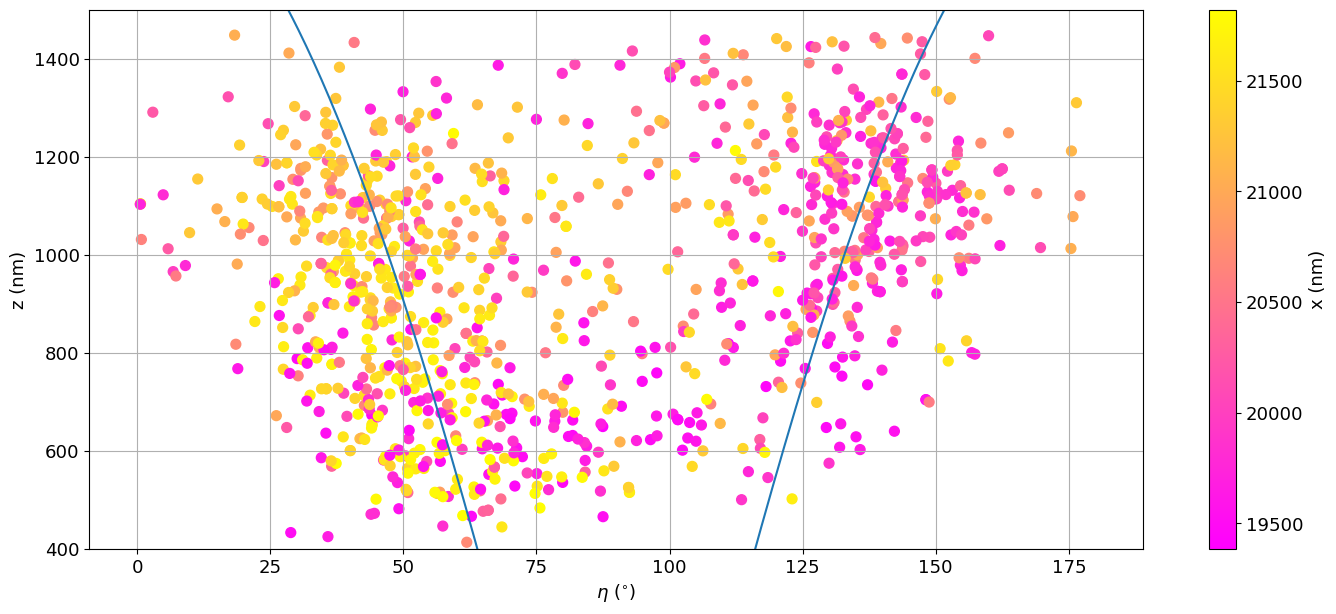

In [25]:
plt.rcParams['figure.figsize'] = [17,7]
plt.rcParams.update({'font.size': 13})
color_data = x[threshold]
scatter = plt.scatter(eta[threshold], z[threshold], c = color_data, cmap='spring', s=50)
cb = plt.colorbar(scatter)
etaa=np.linspace(0, 180, 500)
plt.plot(etaa, -3200+2500*(1+np.abs(np.cos(etaa*np.pi/180))))
cb.set_label('x (nm)')
#cb.set_ticks([0.0, 1.0])
#cb.set_ticklabels(['0', '90'])
plt.ylabel('z (nm)')

plt.xlabel('$\\eta$ $(^{\\circ})$')
plt.ylim((400,1500))
plt.grid()

Text(0, 0.5, 'Occurences')

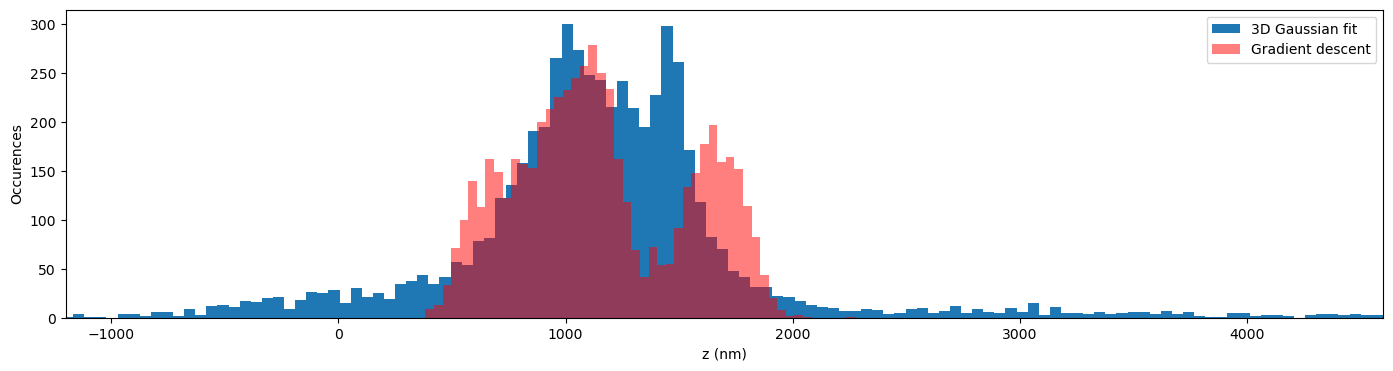

In [26]:
plt.rcParams['figure.figsize'] = [17,4]
plt.rcParams.update({'font.size': 10})
offset=np.mean(z[threshold2])-np.mean(z_start[threshold2])
h2 = plt.hist(z_start[threshold2]+offset, bins=150, label='3D Gaussian fit')
h1 = plt.hist(z[threshold2], bins=50, alpha=0.5, color='r', label='Gradient descent')
plt.legend()
plt.xlim((-1200,4600))
plt.xlabel('z (nm)')
plt.ylabel('Occurences')

In [27]:
z_start = -z_start

In [28]:
off = 2000

In [29]:
n1 = 1.52
n2 = 1.33
epsilon = -(0.638)/(4*0.001*(z[threshold2])*n2)
mm = np.sqrt(n1**2-n2**2)
xi = (n2/n1)*(1-epsilon-(mm/n1)*np.sqrt(epsilon*(epsilon-2)))/(1-((n2/n1)**2)*epsilon*(2-epsilon))
#xi = np.mean(xi)
print(xi)

1        0.669050
2        0.697878
5        0.688200
10       0.684070
15       0.691510
           ...   
11483    0.576987
11485    0.602675
11486    0.642843
11488    0.625021
11492    0.620340
Name: z, Length: 5593, dtype: float64


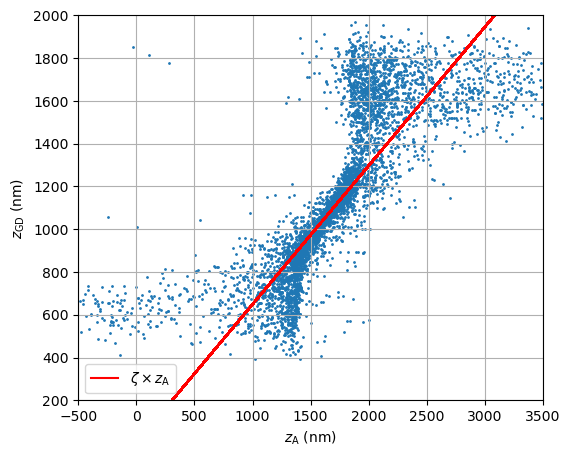

In [30]:
plt.rcParams['figure.figsize'] = [6,5]
plt.rcParams.update({'font.size': 10})
plt.scatter(z_start[threshold2]+off, z[threshold2], s=1)
plt.plot(z_start[threshold2]+off, (np.mean(xi))*(z_start[threshold2]+off), c='r', label='$\\zeta \\times z_{\\mathrm{A}}$')
plt.legend()
plt.xlim((-500, 3500))
plt.ylim((200, 2000))
plt.xlabel('$z_{\\mathrm{A}}$ (nm)')
plt.ylabel('$z_{\\mathrm{GD}}$ (nm)')
plt.grid()

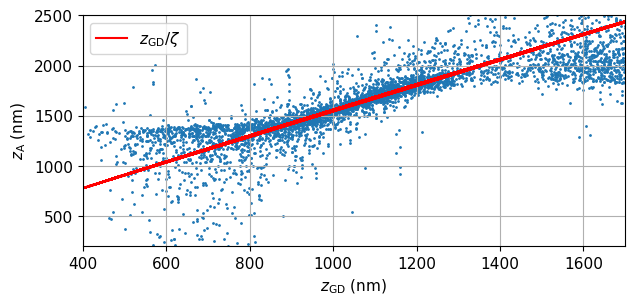

In [32]:
plt.rcParams['figure.figsize'] = [7,3]
plt.rcParams.update({'font.size': 11})
plt.scatter(z[threshold2], z_start[threshold2]+off, s=1)
plt.plot(z[threshold2], (1/xi)*(z[threshold2]), c='r', label='$z_{\\mathrm{GD}} / \\zeta$')
plt.legend()
plt.xlim((400, 1700))
plt.ylim((200, 2500))
plt.xlabel('$z_{\\mathrm{GD}}$ (nm)')
plt.ylabel('$z_{\\mathrm{A}}$ (nm)')
plt.grid()

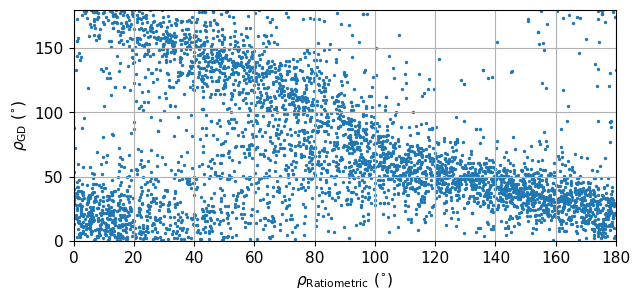

In [33]:
plt.rcParams['figure.figsize'] = [7,3]
plt.rcParams.update({'font.size': 11})
plt.scatter(rho_start[threshold3], (rho[threshold3]-20)%180, s=2)
plt.xlim((0, 180))
plt.ylim((0, 180))
plt.ylabel('$\\rho_{\\mathrm{GD}}$ ($^{\\circ}$)')
plt.xlabel('$\\rho_{\\mathrm{Ratiometric}}$ ($^{\\circ}$)')
plt.grid()

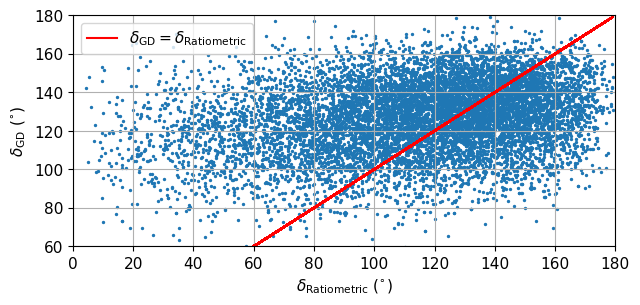

In [34]:
plt.rcParams['figure.figsize'] = [7,3]
plt.rcParams.update({'font.size': 11})
plt.scatter(delta_start[threshold4], delta[threshold4], s=2)
plt.plot(delta_start[threshold4], delta_start[threshold4], c='r', label='$\\delta_{\\mathrm{GD}}=\\delta_{\\mathrm{Ratiometric}}$')
plt.legend()
plt.ylim((60, 180))
plt.xlim((0, 180))
plt.ylabel('$\\delta_{\\mathrm{GD}}$ ($^{\\circ}$)')
plt.xlabel('$\\delta_{\\mathrm{Ratiometric}}$ ($^{\\circ}$)')
plt.grid()

C:\Users\LOCCO_Louise\AppData\Local\Temp\ipykernel_7844\3372115770.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


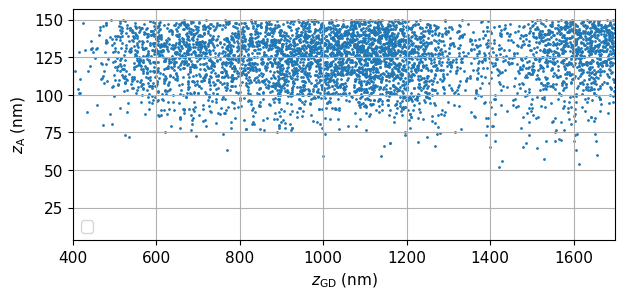

In [36]:
plt.rcParams['figure.figsize'] = [7,3]
plt.rcParams.update({'font.size': 11})
plt.scatter(z[threshold2], delta[threshold2], s=1)
plt.legend()
plt.xlim((400, 1700))
#plt.ylim((200, 2500))
plt.xlabel('$z_{\\mathrm{GD}}$ (nm)')
plt.ylabel('$z_{\\mathrm{A}}$ (nm)')
plt.grid()

In [ ]:
plt.rcParams['figure.figsize'] = [7,3]
hist = plt.hist(delta[threshold4], bins=80, label='Gradient descent')
hist = plt.hist(delta_start[threshold4], bins=80, alpha=0.5, label='Ratiometric method', color='g')
plt.legend()
plt.xlabel('$\\delta$ $(^{\\circ})$')
plt.ylabel('Occurences')